In [63]:
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests
from sklearn.manifold import TSNE

from src.load_data import *
from src.graph_data import *
from src.utils import *

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Users/oscargoudet/Desktop/ada-2024-project-adaholiks', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/oscargoudet/.virtualenvs/ada-2024-project-adaholiks/lib/python3.9/site-packages', '/Users/oscargoudet/Desktop', '/Users/oscargoudet/Desktop', '/Users/oscargoudet/Desktop']
---- WARNING: The following articles have a problem: ----
Badugi has no links (out-edges) listed.
Color_Graphics_Adapter has no links (out-edges) listed.
Directdebit has no category listed.
Directdebit has no links (out-edges) listed.
Donation has no category listed.
Donation has no l

In [40]:
article_df = feather.read_feather('Data/dataframes/article_df_features.feather')
article_df

article        article_unrendered_unicode  \
0         Áedán_mac_Gabráin  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in   
1                     Åland                        %C3%85land   
2             Édouard_Manet                %C3%89douard_Manet   
3                      Éire                         %C3%89ire   
4     Óengus_I_of_the_Picts        %C3%93engus_I_of_the_Picts   
...                     ...                               ...   
4599                Zionism                           Zionism   
4600              Zirconium                         Zirconium   
4601              Zoroaster                         Zoroaster   
4602           Zuid-Gelders                      Zuid-Gelders   
4603                   Zulu                              Zulu   

                                                                                                                          category  \
0     [subject.History.British_History.British_History_1500_and_before_including_Roman_Britain, subject.People.Historical_figures]   
1                                                     [subject.Countries, subject.Geography.European_Geography.European_Countries]   
2                                                                                                         [subject.People.Artists]   
3                                                     [subject.Countries, subject.Geography.European_Geography.European_Countries]   
4     [subject.History.British_History.British_History_1500_and_before_including_Roman_Britain, subject.People.Historical_figures]   
...                                                                                                                            ...   
4599                          [subject.People.Political_People, subject.Religion.Religious_movements_traditions_and_organizations]   
4600                                                                                 [subject.Science.Chemistry.Chemical_elements]   
4601                                                                                [subject.People.Religious_figures_and_leaders]   
4602                                             [subject.Geography.European_Geography, subject.Language_and_literature.Languages]   
4603                                                                                         [subject.Geography.African_Geography]   

                 linkSource  \
0         Áedán_mac_Gabráin   
1                     Åland   
2             Édouard_Manet   
3                      Éire   
4     Óengus_I_of_the_Picts   
...                     ...   
4599                Zionism   
4600              Zirconium   
4601              Zoroaster   
4602           Zuid-Gelders   
4603                   Zulu   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       linkTarget  \
0                                                                                                                                                                                                                                                                                                                                   

In [41]:
composite_scores_df = feather.read_feather('Data/dataframes/composite_scores_df.feather')
composite_scores_df

weight_avg  weight_avg_scaled  unfinished_ratio  \
article                                                          
Achilles         0.834448           4.811790          0.131148   
J._K._Rowling    0.796696           4.044191          0.117647   
Algebra          0.716872           2.421177          0.060606   
Harry_Potter     0.754634           3.188972          0.155844   
Parrot           0.711134           2.304506          0.102564   
...                   ...                ...               ...   
Sport            0.550422          -0.963159          0.512563   
DVD              0.544194          -1.089802          0.393939   
Eukaryote        0.521525          -1.550714          0.432836   
Optical_fiber    0.512302          -1.738252          0.280000   
Actor            0.463882          -2.722738          0.536232   

               unf_ratio_scaled  detour_ratio  detour_ratio_scaled  \
article                                                              
Achilles               0.850784      0.000000             1.312944   
J._K._Rowling          1.006611      0.017544             0.949604   
Algebra                1.664997      0.000000             1.312944   
Harry_Potter           0.565727      0.000000             1.312944   
Parrot                 1.180703      0.000000             1.312944   
...                         ...           ...                  ...   
Sport                 -3.551640      0.173913            -2.288856   
DVD                   -2.182449      0.254902            -3.966165   
Eukaryote             -2.631404      0.229167            -3.433178   
Optical_fiber         -0.867322      0.339286            -5.713781   
Actor                 -3.824837      0.138889            -1.563493   

               comp_score_3  comp_score_2  
article                                    
Achilles           4.158275      4.630274  
J._K._Rowling      3.559448      3.794620  
Algebra            3.068307      2.686373  
Harry_Potter       2.952162      3.310698  
Parrot             2.723494      2.591504  
...                     ...           ...  
Sport             -3.903475     -2.162060  
DVD               -4.100757     -3.241349  
Eukaryote         -4.369271     -3.305899  
Optical_fiber     -4.701717     -4.785863  
Actor             -4.811791     -3.170631  

[820 rows x 8 columns]

In [42]:
merged_df = article_df.merge(composite_scores_df, on='article', how='inner')

In [43]:
merged_df

article article_unrendered_unicode  \
0                 10th_century               10th_century   
1                 11th_century               11th_century   
2                 12th_century               12th_century   
3                 13th_century               13th_century   
4                 14th_century               14th_century   
..                         ...                        ...   
815                      Yeast                      Yeast   
816  Yellowstone_National_Park  Yellowstone_National_Park   
817                       Zeus                       Zeus   
818                   Zimbabwe                   Zimbabwe   
819                       Zinc                       Zinc   

                                                                            category  \
0                                                  [subject.History.General_history]   
1                                                  [subject.History.General_history]   
2                                                  [subject.History.General_history]   
3                                                  [subject.History.General_history]   
4                                                  [subject.History.General_history]   
..                                                                               ...   
815  [subject.Everyday_life.Food_and_agriculture, subject.Science.Biology.Organisms]   
816                                     [subject.Geography.North_American_Geography]   
817                                                    [subject.Religion.Divinities]   
818       [subject.Geography.African_Geography.African_Countries, subject.Countries]   
819                                    [subject.Science.Chemistry.Chemical_elements]   

                    linkSource  \
0                 10th_century   
1                 11th_century   
2                 12th_century   
3                 13th_century   
4                 14th_century   
..                         ...   
815                      Yeast   
816  Yellowstone_National_Park   
817                       Zeus   
818                   Zimbabwe   
819                       Zinc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            linkTarget  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [11th_century, 9th_century, Algeria, Beer, Black_Sea, Byzantine_Empire, Dark_Ages, Dublin, France, Germany, Great_Moravia, India, Italy, Khazars, Lion, Maya_civilization, Mexico, Monarchy, Myanmar, Philippines, Poland, Scotland, Solar_System, Sweden, Time, Viking]   
1                                                                                 [10th_century, 12th_century, 13th_century, 14th_century, 15th_century, 16th_century, 17th_century, 18th_century, 19th_century, 1st_century, 1st_century_BC, 20th_century, 21st_century, 2nd_century, 3rd_century, 4th_century, 5th_century, 6th_century, 7th_century, 8th_century, 9th_cen

We know have a dataframe with all article features aswell as the different composite scores computed in the scores.ipynb file.

In [44]:
merged_df.sort_values(by='comp_score_2', ascending=False)

article article_unrendered_unicode  \
18        Achilles                   Achilles   
404  J._K._Rowling              J._K._Rowling   
349   Harry_Potter               Harry_Potter   
465          Mario                      Mario   
35         Algebra                    Algebra   
..             ...                        ...   
356      Herbivore                  Herbivore   
216            DVD                        DVD   
269      Eukaryote                  Eukaryote   
316            Gas                        Gas   
546  Optical_fiber              Optical_fiber   

                                                              category  \
18   [subject.History.Ancient_History_Classical_History_and_Mythology]   
404                               [subject.People.Writers_and_critics]   
349                           [subject.Language_and_literature.Novels]   
465                   [subject.Everyday_life.Computer_and_Video_games]   
35                                               [subject.Mathematics]   
..                                                                 ...   
356                          [subject.Science.Biology.General_Biology]   
216                 [subject.IT.Computing_hardware_and_infrastructure]   
269                                [subject.Science.Biology.Organisms]   
316                          [subject.Science.Physics.General_Physics]   
546                          [subject.Science.Physics.General_Physics]   

        linkSource  \
18        Achilles   
404  J._K._Rowling   
349   Harry_Potter   
465          Mario   
35         Algebra   
..             ...   
356      Herbivore   
216            DVD   
269      Eukaryote   
316            Gas   
546  Optical_fiber   

                                                                                                                                                                                                                                                                                                                                                                                                      linkTarget  \
18                                                                                                                                                      [Agamemnon, Alexander_the_Great, Apollo, Athena, Athens, Black_Sea, Bob_Dylan, Danube, Ethiopia, Greece, Greek_mythology, Heracles, Homer, Odysseus, Odyssey, Plato, Romania, Romanticism, Trojan_War, Ukraine, William_Shakespeare, World_War_II, Zeus]   
404   [Asteroid, Bristol, Bucharest, Chinese_language, Dinosaur, Doctor_Who, Dutch_language, Edinburgh, Employment, England, French_language, Harry_Potter, London, Manchester, Monty_Python, Moscow, Multiple_sclerosis, Netherlands, Newspaper, Paris, People's_Republic_of_China, Portugal, Pound_sterling, Russian_language, Scotland, The_Simpsons, The_West_Wing_(TV_series), United_States_dollar, Wales]   
349  [Alchemy, Alice's_Adventures_in_Wonderland, Basketball, Chinese_language, Edinburgh, Elizabeth_II_of_the_United_Kingdom, English_language, France, Halloween, IPod, Intelligence, J._K._Rowling, Logic, London, Lord_Voldemort, Manchester, Owl, Oxford, People's_Republic_of_China, Pope_Benedict_XVI, Pope_John_Paul_II, Portugal, Richard_Stallman, Star_Trek, Star_Wars, United_Kingdom, United_States]   
465                                                                                                             [Alice's_Adventures_in_Wonderland, Baseball, Elvis_Presley, English_language, Football_(soccer), Nintendo, Nintendo_DS, Nintendo_Entertainment_System, Opera, Rabbit, Sonic_the_Hedgehog_(character), Star_Trek, Super_Mario_64, Super_Mario_Bros., Superman, Sweden, Television, United_States]   
35                                                                                                  [Ancient_Egypt, Arithmetic, Babylonia, Differential_equation, Elementary_algebra, Euclid, Europe, Geometry, Gottfried_Leibniz, Group_(mathematics), 

test avcec le composite score 3 pour l'instant, à voir si c'est celui qu'on garde à la fin.

In [45]:
merged_df.sort_values(by='comp_score_3', ascending=False)

article article_unrendered_unicode  \
18        Achilles                   Achilles   
404  J._K._Rowling              J._K._Rowling   
35         Algebra                    Algebra   
349   Harry_Potter               Harry_Potter   
561         Parrot                     Parrot   
..             ...                        ...   
689          Sport                      Sport   
216            DVD                        DVD   
269      Eukaryote                  Eukaryote   
546  Optical_fiber              Optical_fiber   
20           Actor                      Actor   

                                                              category  \
18   [subject.History.Ancient_History_Classical_History_and_Mythology]   
404                               [subject.People.Writers_and_critics]   
35                                               [subject.Mathematics]   
349                           [subject.Language_and_literature.Novels]   
561                                    [subject.Science.Biology.Birds]   
..                                                                 ...   
689                                     [subject.Everyday_life.Sports]   
216                 [subject.IT.Computing_hardware_and_infrastructure]   
269                                [subject.Science.Biology.Organisms]   
546                          [subject.Science.Physics.General_Physics]   
20                           [subject.Language_and_literature.Theatre]   

        linkSource  \
18        Achilles   
404  J._K._Rowling   
35         Algebra   
349   Harry_Potter   
561         Parrot   
..             ...   
689          Sport   
216            DVD   
269      Eukaryote   
546  Optical_fiber   
20           Actor   

                                                                                                                                                                                                                                                                                                                                                                                                      linkTarget  \
18                                                                                                                                                      [Agamemnon, Alexander_the_Great, Apollo, Athena, Athens, Black_Sea, Bob_Dylan, Danube, Ethiopia, Greece, Greek_mythology, Heracles, Homer, Odysseus, Odyssey, Plato, Romania, Romanticism, Trojan_War, Ukraine, William_Shakespeare, World_War_II, Zeus]   
404   [Asteroid, Bristol, Bucharest, Chinese_language, Dinosaur, Doctor_Who, Dutch_language, Edinburgh, Employment, England, French_language, Harry_Potter, London, Manchester, Monty_Python, Moscow, Multiple_sclerosis, Netherlands, Newspaper, Paris, People's_Republic_of_China, Portugal, Pound_sterling, Russian_language, Scotland, The_Simpsons, The_West_Wing_(TV_series), United_States_dollar, Wales]   
35                                                                                                  [Ancient_Egypt, Arithmetic, Babylonia, Differential_equation, Elementary_algebra, Euclid, Europe, Geometry, Gottfried_Leibniz, Group_(mathematics), Latin, Linear_algebra, Logic, Mathematical_analysis, Mathematics, Matrix_(mathematics), Muhammad_ibn_Musa_al-Khwarizmi, Number, Quantity, Set, Topology]   
349  [Alchemy, Alice's_Adventures_in_Wonderland, Basketball, Chinese_language, Edinburgh, Elizabeth_II_of_the_United_Kingdom, English_language, France, Halloween, IPod, Intelligence, J._K._Rowling, Logic, London, Lord_Voldemort, Manchester, Owl, Oxford, People's_Republic_of_China, Pope_Benedict_XVI, Pope_John_Paul_II, Portugal, Richard_Stallman, Star_Trek, Star_Wars, United_Kingdom, United_States]   
561                                                                                                  [Adolf_Hitler, African_Grey_Parrot, Amazon_parrot, Animal, Barcelona, Belgium, Bird, Chordate, Cockatiel, Cretaceous, England, Eocene, Europe, Evol

Correlation between composite score ranking and ranks of each metric:
rank_incoming_links       0.162325
rank_num_hyperlinks       0.335951
rank_num_characters       0.251490
rank_hyperlink_density    0.092299
dtype: float64


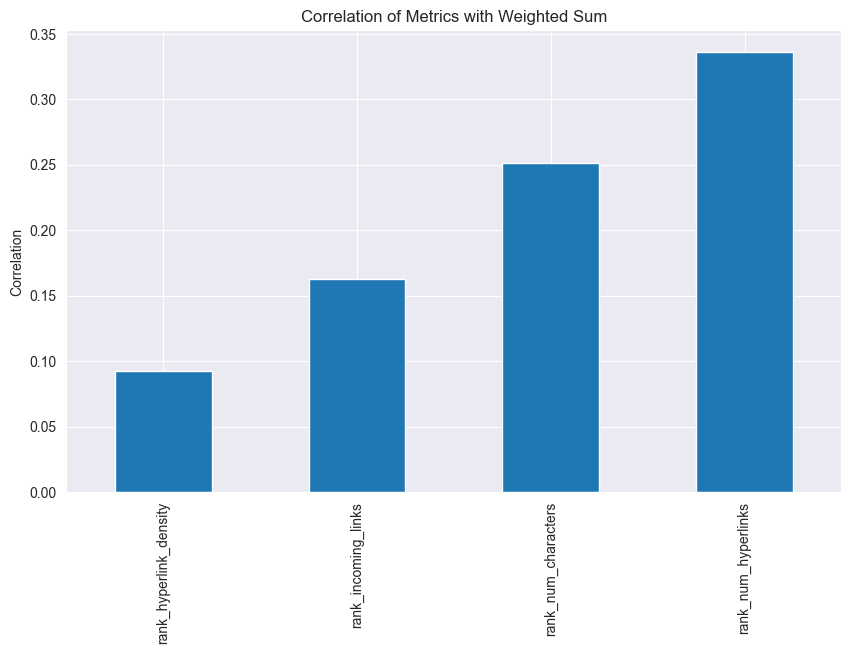

In [46]:
# Rank articles for each attribute
merged_df['rank_incoming_links'] = merged_df['incoming_links'].rank(ascending=False)
merged_df['rank_num_hyperlinks'] = merged_df['num_hyperlinks'].rank(ascending=False)
merged_df['rank_num_characters'] = merged_df['num_characters'].rank(ascending=False)
merged_df['rank_hyperlink_density'] = merged_df['hyperlink_density'].rank(ascending=False)
merged_df['rank_comp_score_3'] = merged_df['comp_score_3'].rank(ascending=False)


# Compute correlations between ranks and weighted_sum
correlations = merged_df[
    ['rank_incoming_links', 'rank_num_hyperlinks', 'rank_num_characters', 'rank_hyperlink_density']
].corrwith(merged_df['rank_comp_score_3'])

# Display correlation results
print("Correlation between composite score ranking and ranks of each metric:")
print(correlations)

# Visualize correlations
import matplotlib.pyplot as plt
correlations.sort_values().plot(kind='bar', figsize=(10, 6), title="Correlation of Metrics with Weighted Sum")
plt.ylabel("Correlation")
plt.show()

In [47]:
merged_df2 = merged_df[['incoming_links','num_hyperlinks','num_characters','hyperlink_density','comp_score_3']]

In [48]:
merged_df2

incoming_links  num_hyperlinks  num_characters  hyperlink_density  \
0                65              26            5713           0.004551   
1                57              48            7734           0.006206   
2                85              45            6639           0.006778   
3                84              34            6090           0.005583   
4                71              31            5846           0.005303   
..              ...             ...             ...                ...   
815              22              42           23178           0.001812   
816              18              29           30425           0.000953   
817              43              29           21592           0.001343   
818              86              63           25255           0.002495   
819              68              36           21264           0.001693   

     comp_score_3  
0       -1.432824  
1       -0.354374  
2       -0.092223  
3       -2.350618  
4       -0.727751  
..            ...  
815     -0.212633  
816     -3.646643  
817     -0.256662  
818     -1.279717  
819      1.776277  

[820 rows x 5 columns]

In [49]:
features_df = merged_df2.drop(columns=['comp_score_3'])
target_df = merged_df2[['comp_score_3']]

In [50]:
from sklearn.model_selection import train_test_split

train_features_df, test_features_df, train_targets_df, test_targets_df = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

train_features_df = train_features_df.reset_index(drop=True)
train_targets_df = train_targets_df.reset_index(drop=True)
test_features_df = test_features_df.reset_index(drop=True)
test_targets_df = test_targets_df.reset_index(drop=True)

print(f"The training dataframe has a size of {train_features_df.shape[0]}.")
print(f"The testing dataframe has a size of {test_features_df.shape[0]}.")

The training dataframe has a size of 656.
The testing dataframe has a size of 164.


In [51]:
train_features_df

incoming_links  num_hyperlinks  num_characters  hyperlink_density
0                90              34           17683           0.001923
1                79              74           43994           0.001682
2                18              16           53390           0.000300
3                59              16            3214           0.004978
4               133              48           43156           0.001112
..              ...             ...             ...                ...
651             105              37           38587           0.000959
652             149              21           43703           0.000481
653              97              50           35597           0.001405
654              33              60           28114           0.002134
655              89             101           52654           0.001918

[656 rows x 4 columns]

In [52]:
from sklearn.preprocessing import StandardScaler # needed to use the function
import statsmodels.api as sm

def standardize_data(train_df, test_df):
    scalar = StandardScaler()

    # Fit to continuous columns and transform
    train_scaled = scalar.fit_transform(train_df)
    test_scaled = scalar.transform(test_df)

    # Convert back to DataFrame to retain column names
    train_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns, index=train_df.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns, index=test_df.index)

    # Add a constant column to the scaled DataFrames
    train_scaled_df = sm.add_constant(train_scaled_df)
    test_scaled_df = sm.add_constant(test_scaled_df)

    return test_scaled_df, train_scaled_df

test_features_df, train_features_df = standardize_data(train_features_df, test_features_df)

print(f"The means of the training dataframe are as follows : \
      {train_features_df.mean()}")
print('-------------------------------------------------------------------')
print(f"The standard deviations of the training dataframe are as follows : \
      {train_features_df.std()}")

The means of the training dataframe are as follows :       const                1.000000e+00
incoming_links      -1.624717e-17
num_hyperlinks       4.332578e-17
num_characters      -8.935941e-17
hyperlink_density   -7.040439e-17
dtype: float64
-------------------------------------------------------------------
The standard deviations of the training dataframe are as follows :       const                0.000000
incoming_links       1.000763
num_hyperlinks       1.000763
num_characters       1.000763
hyperlink_density    1.000763
dtype: float64


In [53]:
train_features_df

const  incoming_links  num_hyperlinks  num_characters  hyperlink_density
0      1.0       -0.042547       -0.393762       -0.726236           0.032293
1      1.0       -0.128427        0.772809        0.738514          -0.130618
2      1.0       -0.604668       -0.918720        1.261596          -1.066218
3      1.0       -0.284571       -0.918720       -1.531735           2.100268
4      1.0        0.293164        0.014538        0.691862          -0.516267
..     ...             ...             ...             ...                ...
651    1.0        0.074561       -0.306270        0.437503          -0.620071
652    1.0        0.418080       -0.772898        0.722314          -0.943827
653    1.0        0.012104        0.072866        0.271048          -0.318388
654    1.0       -0.487560        0.364509       -0.145536           0.175383
655    1.0       -0.050354        1.560245        1.220622           0.029201

[656 rows x 5 columns]

In [54]:
model = sm.OLS(train_targets_df, train_features_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           comp_score_3   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     19.18
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           6.32e-15
Time:                        18:15:42   Log-Likelihood:                -1020.2
No. Observations:                 656   AIC:                             2050.
Df Residuals:                     651   BIC:                             2073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0319      0.04

we have a very low R^2 so it suggest that linear regression might not be the best fit for our data.

let's try to see what atributes are most important using a decision tree.

In [ ]:
train_features_df.drop(columns=['const'], inplace=True)

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model
tree.fit(train_features_df, train_targets_df)

# Predict on the test set
y_pred = tree.predict(test_features_df)

# Evaluate the performance
mse = mean_squared_error(test_targets_df, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
importances = tree.feature_importances_
for feature, importance in zip(train_features_df.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 1.735410870499515
Feature: const, Importance: 0.0
Feature: incoming_links, Importance: 0.14572072494401753
Feature: num_hyperlinks, Importance: 0.6052075611377497
Feature: num_characters, Importance: 0.1534324344312352
Feature: hyperlink_density, Importance: 0.09563927948699774


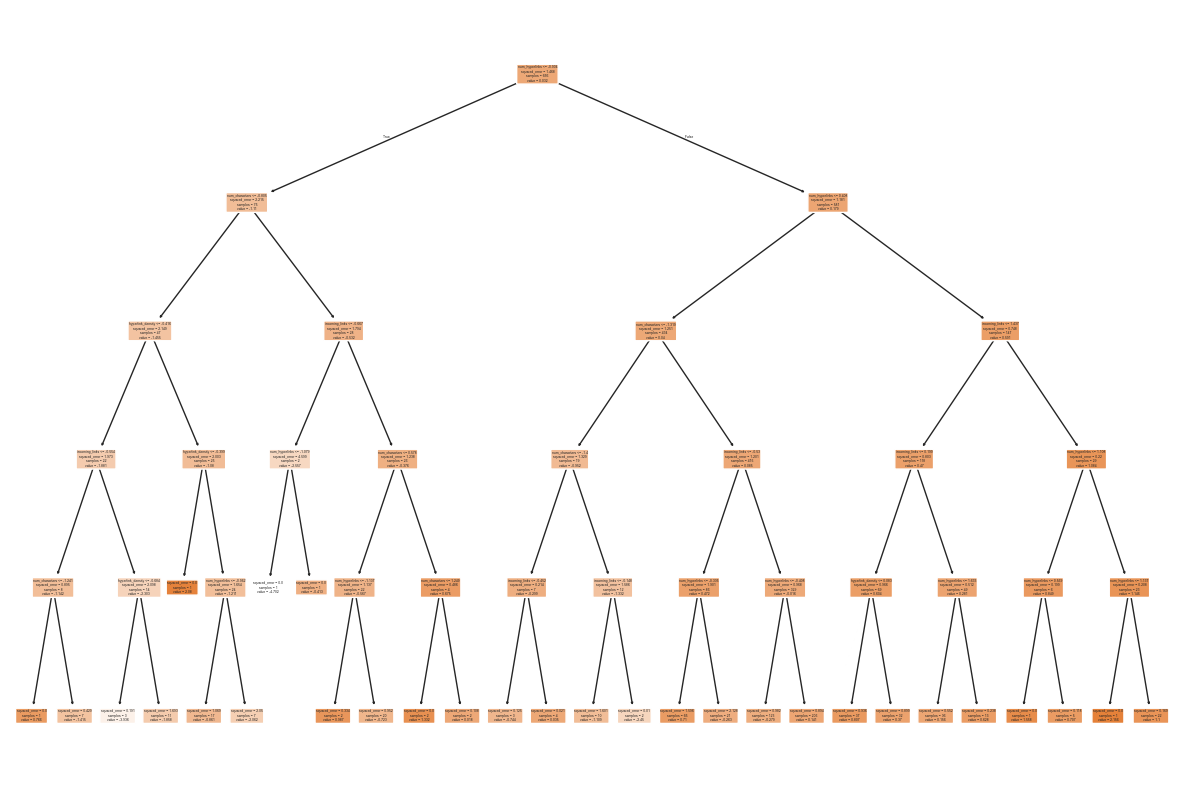

In [56]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))  
plot_tree(tree, feature_names = train_features_df.columns.tolist(), filled=True, rounded=True)
plt.show()

Now with gradient boosting

             Feature  Importance
2     num_hyperlinks    0.345507
3     num_characters    0.245834
4  hyperlink_density    0.243350
1     incoming_links    0.165309
0              const    0.000000


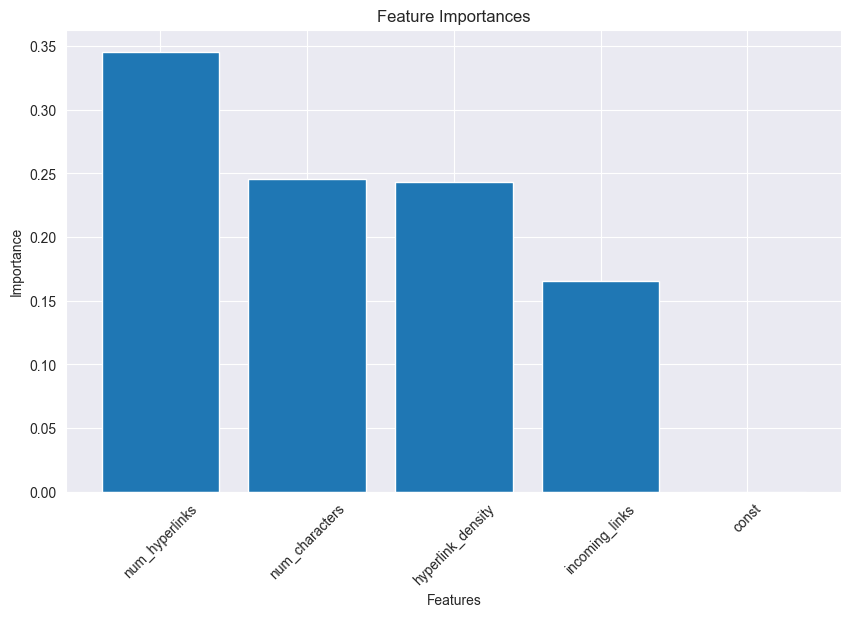

In [62]:
from xgboost import XGBRegressor

# Train an XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(train_features_df, train_targets_df)
y_pred = xgb.predict(test_features_df)

# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_features_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the importance scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

not sure, supposed to be for linear data.

In [64]:
articles = load_article_objects()

# Create an empty directed graph (since links have direction)
G = nx.DiGraph()

# Add nodes and edges
for article_name, article_obj in articles.items():
    # Add the article itself as a node
    G.add_node(article_name, category=article_obj.category)

    # Add edges for each link (out-edges)
    if article_obj.links:
        for link in article_obj.links:
            if link in articles:  # Ensure the linked article exists in the dataset
                G.add_edge(article_name, link)


---- WARNING: The following articles have a problem: ----
Badugi has no links (out-edges) listed.
Color_Graphics_Adapter has no links (out-edges) listed.
Directdebit has no category listed.
Directdebit has no links (out-edges) listed.
Donation has no category listed.
Donation has no links (out-edges) listed.
Douglas_DC-4 has no links (out-edges) listed.
Duchenne_muscular_dystrophy has no links (out-edges) listed.
Friend_Directdebit has no category listed.
Klinefelter%27s_syndrome has no links (out-edges) listed.
Local_community has no links (out-edges) listed.
Lone_Wolf_%28gamebooks%29 has no links (out-edges) listed.
Osteomalacia has no links (out-edges) listed.
Pikachu has no category listed.
Private_Peaceful has no links (out-edges) listed.
Schatzki_ring has no links (out-edges) listed.
Sponsorship_Directdebit has no category listed.
Suikinkutsu has no links (out-edges) listed.
Underground_%28stories%29 has no links (out-edges) listed.
Vacutainer has no links (out-edges) listed.
Wik

In [65]:
merged_df

article article_unrendered_unicode  \
0                 10th_century               10th_century   
1                 11th_century               11th_century   
2                 12th_century               12th_century   
3                 13th_century               13th_century   
4                 14th_century               14th_century   
..                         ...                        ...   
815                      Yeast                      Yeast   
816  Yellowstone_National_Park  Yellowstone_National_Park   
817                       Zeus                       Zeus   
818                   Zimbabwe                   Zimbabwe   
819                       Zinc                       Zinc   

                                                                            category  \
0                                                  [subject.History.General_history]   
1                                                  [subject.History.General_history]   
2                                                  [subject.History.General_history]   
3                                                  [subject.History.General_history]   
4                                                  [subject.History.General_history]   
..                                                                               ...   
815  [subject.Everyday_life.Food_and_agriculture, subject.Science.Biology.Organisms]   
816                                     [subject.Geography.North_American_Geography]   
817                                                    [subject.Religion.Divinities]   
818       [subject.Geography.African_Geography.African_Countries, subject.Countries]   
819                                    [subject.Science.Chemistry.Chemical_elements]   

                    linkSource  \
0                 10th_century   
1                 11th_century   
2                 12th_century   
3                 13th_century   
4                 14th_century   
..                         ...   
815                      Yeast   
816  Yellowstone_National_Park   
817                       Zeus   
818                   Zimbabwe   
819                       Zinc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            linkTarget  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [11th_century, 9th_century, Algeria, Beer, Black_Sea, Byzantine_Empire, Dark_Ages, Dublin, France, Germany, Great_Moravia, India, Italy, Khazars, Lion, Maya_civilization, Mexico, Monarchy, Myanmar, Philippines, Poland, Scotland, Solar_System, Sweden, Time, Viking]   
1                                                                                 [10th_century, 12th_century, 13th_century, 14th_century, 15th_century, 16th_century, 17th_century, 18th_century, 19th_century, 1st_century, 1st_century_BC, 20th_century, 21st_century, 2nd_century, 3rd_century, 4th_century, 5th_century, 6th_century, 7th_century, 8th_century, 9th_cen

In [67]:
pagerank = nx.pagerank(G)  # Compute PageRank
merged_df['pagerank'] = merged_df['article'].map(pagerank)  # Add as a feature

In [68]:
merged_df

article article_unrendered_unicode  \
0                 10th_century               10th_century   
1                 11th_century               11th_century   
2                 12th_century               12th_century   
3                 13th_century               13th_century   
4                 14th_century               14th_century   
..                         ...                        ...   
815                      Yeast                      Yeast   
816  Yellowstone_National_Park  Yellowstone_National_Park   
817                       Zeus                       Zeus   
818                   Zimbabwe                   Zimbabwe   
819                       Zinc                       Zinc   

                                                                            category  \
0                                                  [subject.History.General_history]   
1                                                  [subject.History.General_history]   
2                                                  [subject.History.General_history]   
3                                                  [subject.History.General_history]   
4                                                  [subject.History.General_history]   
..                                                                               ...   
815  [subject.Everyday_life.Food_and_agriculture, subject.Science.Biology.Organisms]   
816                                     [subject.Geography.North_American_Geography]   
817                                                    [subject.Religion.Divinities]   
818       [subject.Geography.African_Geography.African_Countries, subject.Countries]   
819                                    [subject.Science.Chemistry.Chemical_elements]   

                    linkSource  \
0                 10th_century   
1                 11th_century   
2                 12th_century   
3                 13th_century   
4                 14th_century   
..                         ...   
815                      Yeast   
816  Yellowstone_National_Park   
817                       Zeus   
818                   Zimbabwe   
819                       Zinc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            linkTarget  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [11th_century, 9th_century, Algeria, Beer, Black_Sea, Byzantine_Empire, Dark_Ages, Dublin, France, Germany, Great_Moravia, India, Italy, Khazars, Lion, Maya_civilization, Mexico, Monarchy, Myanmar, Philippines, Poland, Scotland, Solar_System, Sweden, Time, Viking]   
1                                                                                 [10th_century, 12th_century, 13th_century, 14th_century, 15th_century, 16th_century, 17th_century, 18th_century, 19th_century, 1st_century, 1st_century_BC, 20th_century, 21st_century, 2nd_century, 3rd_century, 4th_century, 5th_century, 6th_century, 7th_century, 8th_century, 9th_cen